# Data Science in Python part 1

## Preliminary analysis

We will use the following packages:

- pandas: data storage, manipulation and statistics
- matplotlib: python's basic plotting package (equivalent to ggplot in R)
- seaborn: an interface to matplotlib built around data visualisation
- plotly: a more advanced graphical package for data visualisation

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Importing and viewing data

We use pandas to import the dataset `life_expectancy.csv` into a `DataFrame`.

A `DataFrame` (dataframe) is a two-dimensional tabular data format.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/IDEMSInternational/GHAIDEMS-data-training/main/life_expectancy.csv")

The command `df.head()` shows the first five rows of a dataframe.

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Some other useful commands:

- `df.columns` shows all the columns.
- `df["column_name"]` restricts the data to a specific column.
- `df[["column_name_1", "column_name_2", ...]]` restricts the data to specific columns.
- `df.info()` displays information about the entries (number, non-null, data type).

In [4]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
df["Adult Mortality"]

# Try changing "Adult Mortality" to any value in the list above.

0       263.0
1       271.0
2       268.0
3       272.0
4       275.0
        ...  
2933    723.0
2934    715.0
2935     73.0
2936    686.0
2937    665.0
Name: Adult Mortality, Length: 2938, dtype: float64

In [6]:
df[["Country", "Adult Mortality", "Schooling", "GDP"]].head()

# Try selecting any 5 columns in the list above.

,Country,Adult Mortality,Schooling,GDP
0,Afghanistan,263.0,10.1,584.259210
1,Afghanistan,271.0,10.0,612.696514
2,Afghanistan,268.0,9.9,631.744976
3,Afghanistan,272.0,9.8,669.959000
4,Afghanistan,275.0,9.5,63.537231


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

## Basic statistics

pandas can calculate basic statistics for a column or the whole dataframe.

In [8]:
df["GDP"].min()

1.68135

In [9]:
df["percentage expenditure"].max()

19479.91161

Does this seem sensible as a percentage?

In [10]:
df["BMI"].mean()

38.321246556473824

Does this seem sensible as an average BMI?

pandas has a very useful function, `df.describe`, which automatically generates summary statistics for every column of the dataframe.

In [11]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


## Basic visualisation

The seaborn package is very good at quickly generating plots of your data. The function `sns.displot` produces a histogram of a single column.

Since the data contains multiple entries per country, we will look at the mean values per country across years using `df.groupby("Country").mean()`.

In [12]:
df_mean = df.drop("Year", axis=1).groupby("Country").mean(numeric_only=True).reset_index()

In [13]:
df_mean.head()

,Country,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250
1,Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750
2,Algeria,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.7500,4.604000,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250
3,Angola,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.1250,3.919333,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375
4,Antigua and Barbuda,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,96.9375,4.791333,98.3125,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375


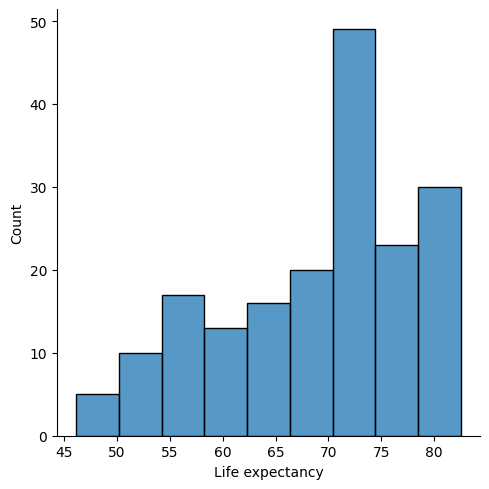

In [14]:
sns.displot(df_mean, x="Life expectancy")
plt.show()

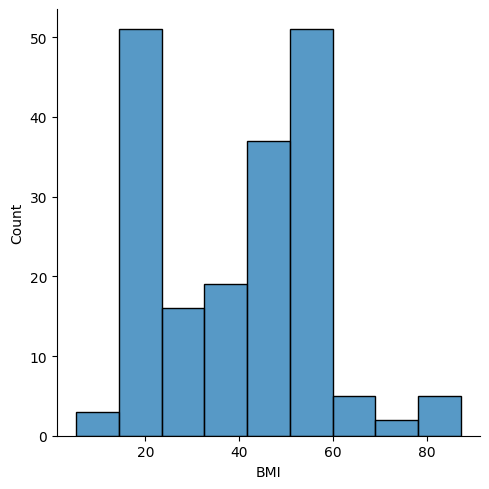

In [15]:
sns.displot(df_mean, x="BMI")
plt.show()

This looks bimodal. Why do you think that is?

## Over to you

Let's focus on a single country, Ghana. Try to use the above tools to detect as many problems in the data as you can. When you're doing so, try to think of where these issues might have occured.

In [16]:
# You can change Ghana to any other country in the dataset.

df_ghana = df[df["Country"] == "Ghana"]

display(df_ghana)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1010,Ghana,2015,Developing,62.4,249.0,37,NaN,0.000000,88.0,23,...,88.0,NaN,88.0,0.7,1361.113950,27582821.0,6.2,6.1,0.575,11.4
1011,Ghana,2014,Developing,62.1,253.0,37,0.01,97.677946,98.0,124,...,93.0,3.56,98.0,0.8,1432.227943,26962563.0,6.4,6.3,0.576,11.7
1012,Ghana,2013,Developing,61.9,254.0,38,0.01,28.668978,9.0,319,...,91.0,4.63,9.0,0.9,1814.492297,26346251.0,6.6,6.4,0.570,11.5
1013,Ghana,2012,Developing,61.6,257.0,39,0.01,151.899429,92.0,1613,...,91.0,4.79,92.0,0.9,1629.822200,2573349.0,6.7,6.6,0.563,11.2
1014,Ghana,2011,Developing,61.2,263.0,40,1.64,225.221947,91.0,120,...,91.0,4.81,91.0,1.3,1574.978653,25121796.0,6.9,6.8,0.554,10.9
1015,Ghana,2010,Developing,69.0,267.0,40,1.69,195.982463,94.0,641,...,94.0,5.33,94.0,1.9,1312.675570,2451214.0,7.1,7.0,0.547,10.5
1016,Ghana,2009,Developing,66.0,271.0,41,1.76,30.722905,94.0,101,...,94.0,5.17,94.0,2.1,186.765380,2393831.0,7.3,7.2,0.542,10.4
1017,Ghana,2008,Developing,63.0,275.0,41,1.78,161.010643,93.0,82,...,92.0,4.85,93.0,2.2,1224.415540,2329864.0,7.5,7.4,0.530,9.8
1018,Ghana,2007,Developing,59.9,28.0,41,1.25,3.181374,94.0,6,...,94.0,5.30,94.0,2.6,19.686718,227212.0,7.7,7.6,0.519,9.1
1019,Ghana,2006,Developing,59.4,288.0,41,1.70,129.026336,84.0,420,...,84.0,4.64,84.0,2.9,922.935168,22113425.0,7.9,7.9,0.510,8.7


Try to think about:

- Do the values make sense for the column heading? Percentages should be out of 100, mortality rates per 1000.
- Are the values in a column consistent with each other? Are there outliers?
- Do the missing values make sense?

You could also look at data from other countries by changing Ghana to any other country in the dataset.

The following code can help visualise trends over years to help check consistency. Just change "Life expectancy" to any other column name.

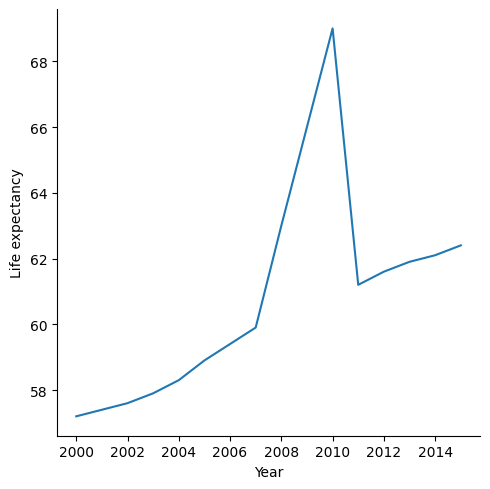

In [17]:
sns.relplot(df_ghana, x="Year", y="Life expectancy", kind="line")
plt.show()